In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from scipy.stats import kurtosis, skew
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.preprocessing import Imputer
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc
import matplotlib.pyplot as plt   
import seaborn as sns
%matplotlib inline 
from sklearn.metrics import roc_curve, auc

# Question 1. Read the column description and ensure you understand each attribute well

ANSWER: Out of all the given attributes, Personal Loan will be our target variable here as it determines if a customer has accepted the personal loan offered in the last campaign

# Question 2. Study the data distribution in each attribute, share your findings. (10 points)

In [2]:
bank_loan = pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")
bank_loan.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
bank_loan.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [4]:
#FINDINGS: as experience column is negative, therefore, replacing the negative values to 0
bank_loan.replace(-1,0, inplace=True)
bank_loan.replace(-2,0, inplace=True)
bank_loan.replace(-3,0, inplace=True)

# Distribution of numerical attributes

count    5000.000000
mean       20.119600
std        11.440484
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64


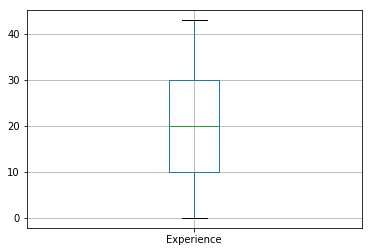

In [5]:
#Experience
print(bank_loan["Experience"].describe())
bank_loan.boxplot(column='Experience')

count    5000.000000
mean       73.774200
std        46.033729
min         8.000000
25%        39.000000
50%        64.000000
75%        98.000000
max       224.000000
Name: Income, dtype: float64


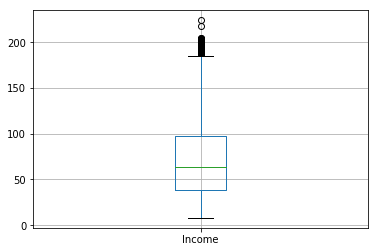

In [6]:
print(bank_loan["Income"].describe())
bank_loan.boxplot(column='Income')

In [7]:
#the above boxplot shows that there are outliers

count    5000.000000
mean        1.937938
std         1.747659
min         0.000000
25%         0.700000
50%         1.500000
75%         2.500000
max        10.000000
Name: CCAvg, dtype: float64


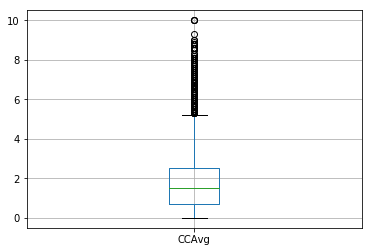

In [8]:
print(bank_loan["CCAvg"].describe())
bank_loan.boxplot(column='CCAvg')

In [9]:
#the above boxplot shows that there are outliers

count    5000.000000
mean       56.498800
std       101.713802
min         0.000000
25%         0.000000
50%         0.000000
75%       101.000000
max       635.000000
Name: Mortgage, dtype: float64


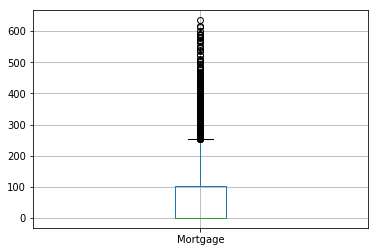

In [10]:
print(bank_loan["Mortgage"].describe())
bank_loan.boxplot(column='Mortgage')

In [11]:
#the above boxplot shows that there are outliers

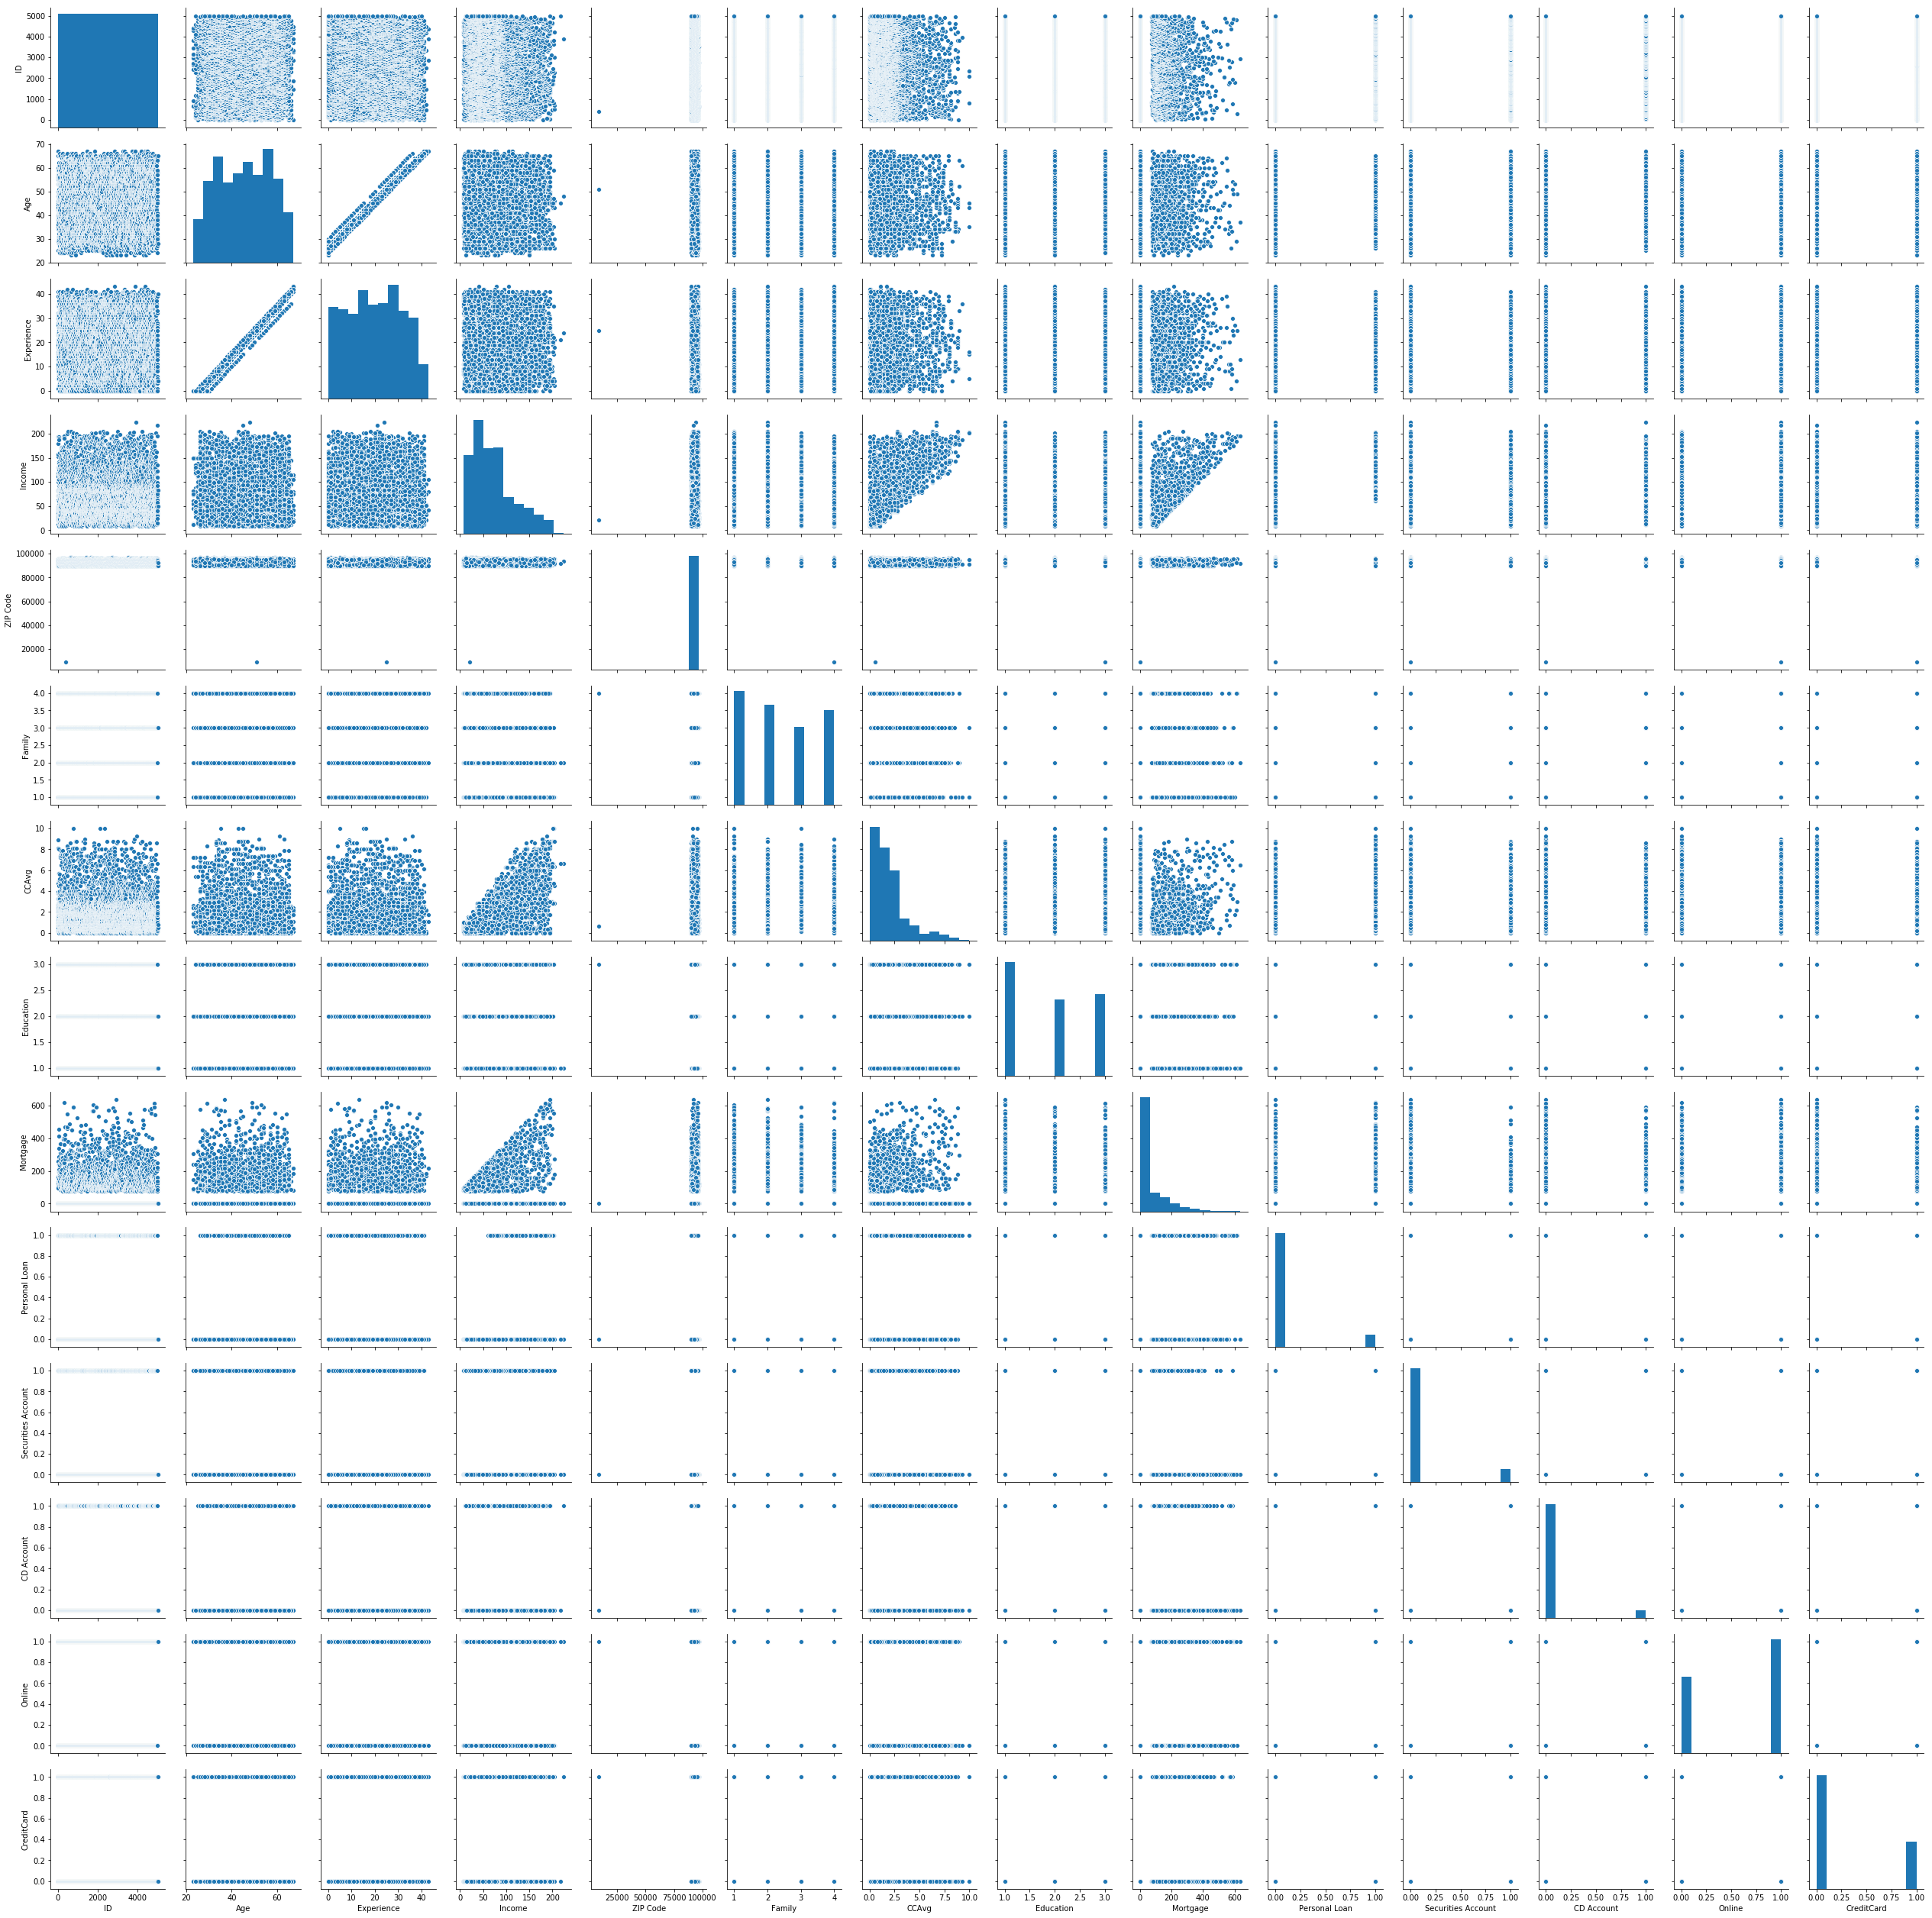

In [12]:
sns.pairplot(bank_loan)

# QUESTION 3: Get the target column distribution.

In [13]:
bank_loan.groupby(["Personal Loan"]).count()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480


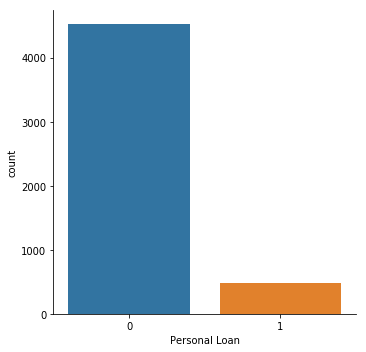

In [14]:
sns.catplot(x="Personal Loan", kind="count", data=bank_loan);

This plot shows that with previous campaign process only 9.6% customers took personal loan.

# QUESTION 4. Split the data into training and test set in the ratio of 70:30 respectively

In [15]:
X = bank_loan.drop(["Personal Loan", "ID", "Age", "CCAvg", "ZIP Code"], axis=1)
y = bank_loan["Personal Loan"]
test_size = 0.30 # taking 70:30 training and test set
seed = 10  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed, stratify = y)

# QUESTION 5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans

### Logistic Regression

In [16]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict_LR = model.predict(X_test)

In [17]:
model_score = model.score(X_test, y_test)
print(model_score)

0.9426666666666667


In [18]:
pd.DataFrame(data=[accuracy_score(y_test,y_predict_LR ), 
                   recall_score(y_test, y_predict_LR),
                   precision_score(y_test, y_predict_LR),
                   f1_score(y_test, y_predict_LR)], 
             index=["accuracy", "recall", "precision", "f1Score"], columns = {"Score"})

,Score
accuracy,0.942667
recall,0.534722
precision,0.802083
f1Score,0.641667


### Naïve Bayes

In [19]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None)

In [20]:
y_predict_NB = model.predict(X_test)

In [21]:
model_score = model.score(X_test, y_test)
model_score

0.8946666666666667

In [22]:
pd.DataFrame(data=[accuracy_score(y_test, y_predict_NB), 
                   recall_score(y_test, y_predict_NB),
                   precision_score(y_test, y_predict_NB),
                   f1_score(y_test, y_predict_NB)], 
             index=["accuracy", "recall", "precision", "f1Score"], columns = {"Score"})

,Score
accuracy,0.894667
recall,0.423611
precision,0.448529
f1Score,0.435714


### K-NN 

In [23]:
NNH = KNeighborsClassifier(n_neighbors= 10)

In [24]:
# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is always adviced to scale numeric attributes in models that calculate distances.

X1 = X.apply(zscore)  # convert all attributes to Z scale 

In [25]:
y1 = pd.get_dummies(y, drop_first=True)

In [26]:
test_size = 0.30 # taking 70:30 training and test set
seed = 10  # Random numbmer seeding for reapeatability of the code
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=test_size, random_state=seed, shuffle=True, stratify=y)

In [27]:
# Call Nearest Neighbour algorithm, attaching data making as x and y axis
NNH.fit(X1_train, y1_train)

C:\Users\malash01\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [28]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point
y_predict_KNN = NNH.predict(X1_test)

In [29]:
NNH.score(X1_test, y1_test)

0.9506666666666667

In [30]:
NNH.score(X1_train, y1_train)

0.9605714285714285

In [31]:
pd.DataFrame(data=[accuracy_score(y1_test, y_predict_KNN), 
                   recall_score(y1_test, y_predict_KNN),
                   precision_score(y1_test, y_predict_KNN),
                   f1_score(y1_test, y_predict_KNN)], 
             index=["accuracy", "recall", "precision", "f1Score"],columns = {"Score"})

,Score
accuracy,0.950667
recall,0.500000
precision,0.972973
f1Score,0.660550


#  QUESTION 6. Print the confusion matrix for all the above models 

### Logistic Regression

In [32]:
metrics.confusion_matrix(y_test, y_predict_LR)

array([[1337,   19],
       [  67,   77]], dtype=int64)

True Positives (TP): we correctly predicted that the customer will take loan : 1337

True Negatives (TN): we correctly predicted that the customer will not take loan : 77

False Positives (FP): we incorrectly predicted that the customer will take loan (a "Type I error") 67 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that the customer will not take loan (a "Type II error") 19 Falsely predict negative Type II error

### Naive Bayes

In [33]:
metrics.confusion_matrix(y_test, y_predict_NB)

array([[1281,   75],
       [  83,   61]], dtype=int64)

True Positives (TP): we correctly predicted that the customer will take loan : 1281

True Negatives (TN): we correctly predicted that the customer will not take loan : 61

False Positives (FP): we incorrectly predicted that the customer will take loan (a "Type I error") 83 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that the customer will not take loan (a "Type II error") 75 Falsely predict negative Type II error

### K-NN 

In [34]:
metrics.confusion_matrix(y1_test, y_predict_KNN)

array([[1354,    2],
       [  72,   72]], dtype=int64)

True Positives (TP): we correctly predicted that the customer will take loan : 1354

True Negatives (TN): we correctly predicted that the customer will not take loan : 72

False Positives (FP): we incorrectly predicted that the customer will take loan (a "Type I error") 72 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that the customer will not take loan (a "Type II error") 2 Falsely predict negative Type II error

#  QUESTION 7. Give your reasoning on which is the best model in this case and why it performs better?

Answer: Looking and compairing the Accuracy, f1 Score and the confusion matrix of all the three models, 
I will select Logistic Regression.